In [44]:
import pyaccel as pa
import pymodels as pm
import matplotlib.pyplot as plt
from siriuspy.search import PSSearch
from siriuspy.devices import PowerSupply
from siriuspy.epics import PV

In [3]:
def create_model():
    si = pm.si.create_accelerator()
    si.cavity_on = True
    si.radiation_on = True
    si.vchamber_on = True
    return si

In [5]:
si = create_model()

In [6]:
famdata = pm.si.get_family_data(si)

In [7]:
fch_dev = famdata['FCH']['devnames']
fch_idx = famdata['FCH']['index']
fcv_dev = famdata['FCV']['devnames']
fcv_idx = famdata['FCV']['index']
bpm_idx = pa.lattice.find_indices(si, 'fam_name', 'BPM')

In [8]:
ch_dev =  famdata['CH']['devnames']

In [17]:
fch = PowerSupply(fch_dev[2])

In [32]:
fchpv = PV(fch_dev[5])

In [48]:
fchnames = PSSearch.get_psnames({'dev':'FCH'})

In [53]:
PSSearch.get_pstype_dict()

{'li-spect-45deg': ('bipolar', 'corrector-horizontal'),
 'li-quadrupole-short': ('bipolar', 'quadrupole'),
 'li-quadrupole-long': ('bipolar', 'quadrupole'),
 'li-corrector-ch-short': ('bipolar', 'corrector-horizontal'),
 'li-corrector-cv-short': ('bipolar', 'corrector-vertical'),
 'li-corrector-ch-long': ('bipolar', 'corrector-horizontal'),
 'li-corrector-cv-long': ('bipolar', 'corrector-vertical'),
 'li-solenoid-fam': ('monopolar', 'solenoid'),
 'li-solenoid': ('monopolar', 'solenoid'),
 'li-lens': ('bipolar', 'lens'),
 'li-lens-reversed': ('bipolar', 'lens'),
 'tb-dipole-b-fam': ('bipolar', 'dipole'),
 'tb-quadrupole': ('bipolar', 'quadrupole'),
 'tb-corrector-ch': ('bipolar', 'corrector-horizontal'),
 'tb-corrector-cv': ('bipolar', 'corrector-vertical'),
 'tb-corrector-strong-ch': ('bipolar', 'corrector-horizontal'),
 'tb-corrector-strong-cv': ('bipolar', 'corrector-vertical'),
 'tb-injseptum': ('monopolar', 'corrector-horizontal'),
 'bo-dipole-b-fam': ('bipolar', 'dipole'),
 'bo-qu

Computing OR matrix

In [178]:
si = create_model()
orbit_bef = pa.tracking.find_orbit6(accelerator=si, indices=bpm_idx)
nrows = len(bpm_idx)
ncolumns = len(fch_idx)
mat_orbx = np.zeros([nrows, ncolumns])

HKICK = 5e-6

for j, fidx in enumerate(fch_idx):
    si[fidx[0]].hkick_polynom = HKICK/2
    orbit1 = pa.tracking.find_orbit6(accelerator=si, indices=bpm_idx)
    si[fidx[0]].hkick_polynom = -HKICK/2
    orbit2 = pa.tracking.find_orbit6(accelerator=si, indices=bpm_idx)
    
    dorbit = orbit1[0] - orbit2[0]
    mat_orbx[:, j] = dorbit
    si[fidx[0]].hkick_polynom = 0

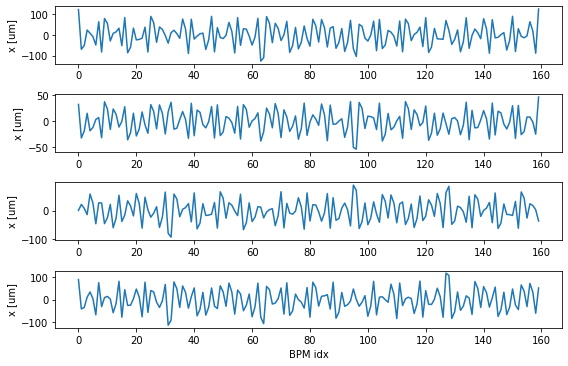

In [179]:
fig, axis = plt.subplots(4, figsize=(8, 5))
for j,ax in enumerate(axis):
    ax.plot(mat_orbx[:, j]*1e6)
    ax.set_ylabel('x [um]')
plt.tight_layout()
axis[-1].set_xlabel('BPM idx')
plt.show()

In [187]:
si=create_model()
mat_orby = np.zeros([nrows, ncolumns])
VKICK = 5e-6

for j, fidx in enumerate(fcv_idx):
    si[fidx[0]].vkick_polynom = VKICK/2
    orbit1 = pa.tracking.find_orbit6(accelerator=si, indices=bpm_idx)
    si[fidx[0]].vkick_polynom = -VKICK/2
    orbit2 = pa.tracking.find_orbit6(accelerator=si, indices=bpm_idx)
    
    dorbit = orbit1[2] - orbit2[2]
    mat_orby[:, j] = dorbit
    si[fidx[0]].vkick_polynom = 0

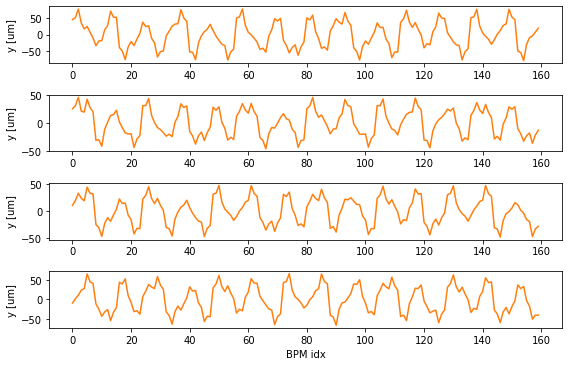

In [188]:
fig, axis = plt.subplots(4, figsize=(8, 5))
for j,ax in enumerate(axis):
    ax.plot(mat_orby[:, j]*1e6, color='tab:orange')
    ax.set_ylabel('y [um]')
plt.tight_layout()
axis[-1].set_xlabel('BPM idx')
plt.show()